In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### 1. Dataset (x,y) avec m exemples

$f(x) = ax +b$

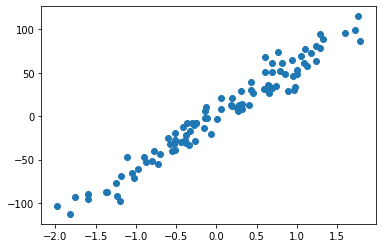

In [4]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x,y)

In [5]:
print(x.shape)
# reshape pour redimmensionné notre matrix 
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [6]:
# Création matrice X
# np.ones pour creer un vecteur remplie 1 de même dimension que x
X= np.hstack((x, np.ones(x.shape)))

### Création de theta

In [7]:
# random ^pur créer un vecteur de nombre aléatoire
theta = np.random.randn(2,1)
theta.shape
theta

array([[-0.51547691],
       [-1.59950715]])

### Modéle

In [8]:
def model(X, theta):
    return X.dot(theta)


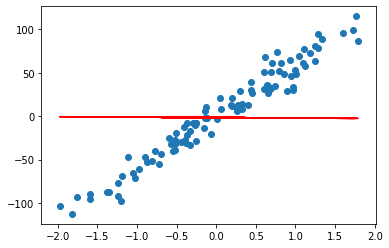

In [9]:
model(X, theta)

plt.plot(x, model(X, theta), c = 'r')
plt.scatter(x,y)

### fonction cout

$J(a,b) = \frac{1}{2m}\sum \limits_{\underset{}{i=1}}^m (ax^i + b -y^i)^2$

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X, theta)- y)**2)

In [11]:
cost_function(X, y, theta)

1477.051614199431

### Descende de gradient et gradient

$\frac{\partial J(a,b)}{\partial a} = \frac{1}{m}\sum \limits_{\underset{}{i=1}}^m x^i(ax^i + b -y^i)$

$\frac{\partial J(a,b)}{\partial b} = \frac{1}{m}\sum \limits_{\underset{}{i=1}}^m (ax^i + b -y^i)$

In [12]:
# Création fonction gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta)- y)
   

### algo de gradient descendant

$ a := a - \alpha \frac{\partial J(a,b)}{\partial a}$

$ b := b - \alpha \frac{\partial J(a,b)}{\partial b}$

In [13]:
# Création fonction Descente de gradient.
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # creation rempli de 0, du nombre d'itération
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad (X, y, theta)
        # on enregsitre le cout de notre modéle pour itération
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

### Machine learning

In [20]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.001, n_iterations= 5000)

In [21]:
theta_final

array([[58.07745858],
       [ 0.39441551]])

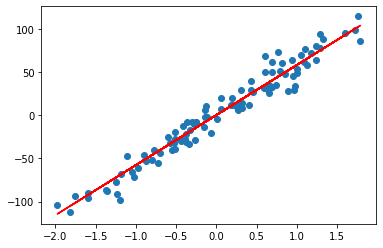

In [22]:
#creation vecteur prediction
prediction = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, prediction, c="r")

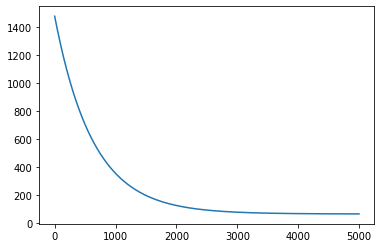

In [23]:
plt.plot(range(5000), cost_history)

### Coeficient de determination

In [24]:
def coef_deter(y,pred):
    u = ((y - pred)**2).sum()
    v= ((y - y.mean())**2).sum()
    return 1 -u/v

In [25]:
coef_deter(y, prediction)

0.9560434817737109